In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import getpass 
import statsmodels.api as sm
%matplotlib inline

### Dataset

This dataset was gotten from Eurostat's for our analysis 

In [2]:
df = pd.read_csv("tps00203.csv")

In [3]:
df.head()

,Unnamed: 0,age,unit,sex,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Y15-74,PC_ACT,T,AT,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,5.5,4.9,4.5
1,1,Y15-74,PC_ACT,T,BE,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,7.1,6.0,5.4
2,2,Y15-74,PC_ACT,T,BG,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6,6.2,5.2,4.2
3,3,Y15-74,PC_ACT,T,CH,NaN,NaN,4.8,4.4,4.5,4.8,4.9,4.8,5.0,4.8,4.7,4.4
4,4,Y15-74,PC_ACT,T,CY,3.7,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0,11.1,8.4,7.1


In [4]:
df.shape

(117, 17)

In [5]:
df.describe()

,Unnamed: 0,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,117.000000,108.000000,108.000000,111.000000,114.000000,114.000000,114.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,607.260185,774.686111,797.910811,778.185088,853.225439,894.043860,839.984615,783.817949,724.737607,656.189744,595.461538,562.196581
std,33.919021,2456.956081,3132.516677,3283.085614,3259.217434,3599.762150,3771.901988,3551.967011,3295.096567,3027.482547,2726.157211,2457.692951,2295.075996
min,0.000000,1.900000,2.300000,2.500000,2.300000,2.200000,2.400000,2.500000,3.100000,2.500000,1.900000,1.500000,1.300000
25%,29.000000,4.400000,5.700000,6.100000,6.100000,6.200000,6.550000,6.200000,6.100000,5.600000,4.900000,4.200000,3.800000
50%,58.000000,6.900000,9.050000,10.000000,10.200000,10.700000,10.750000,10.700000,10.000000,9.000000,8.100000,7.100000,6.600000
75%,87.000000,92.750000,187.750000,209.000000,187.250000,186.500000,159.000000,158.000000,134.000000,129.000000,115.000000,106.000000,104.000000
max,116.000000,16755.000000,21412.000000,22814.000000,22986.000000,25127.000000,26154.000000,24660.000000,22737.000000,20766.000000,18619.000000,16716.000000,15507.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'age', 'unit', 'sex', 'geo', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

Dropping the `Unnamed: 0` column

In [7]:
df.drop('Unnamed: 0',axis =1,inplace = True)

In [8]:
df.head()

,age,unit,sex,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Y15-74,PC_ACT,T,AT,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,5.5,4.9,4.5
1,Y15-74,PC_ACT,T,BE,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,7.1,6.0,5.4
2,Y15-74,PC_ACT,T,BG,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6,6.2,5.2,4.2
3,Y15-74,PC_ACT,T,CH,NaN,NaN,4.8,4.4,4.5,4.8,4.9,4.8,5.0,4.8,4.7,4.4
4,Y15-74,PC_ACT,T,CY,3.7,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0,11.1,8.4,7.1


### Anaylsis goals
* For this anaylsis we will be only considering data's that has to do with `Germany`
* Also we will be limiting the analysis to percentage of `Germany` active population
* Drop the irrelevant columns 

In [9]:
# Accessing the columns
df.age.value_counts()

Y15-74    117
Name: age, dtype: int64

Since the columns: `age`, `sex` has unique values then it simply means we don't really need them for this anaylsis because the age group we are considering is known and the sex is total i.e both males and females. 

Also, we will be working only with the `PC_ACT` which means the active population from the unit column.

In [10]:
# dropping the age and sex columns.
a = ["age","sex"]
df = df.drop(a, axis = 1)

In [11]:
df.head()

,unit,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,PC_ACT,AT,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,5.5,4.9,4.5
1,PC_ACT,BE,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,7.1,6.0,5.4
2,PC_ACT,BG,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6,6.2,5.2,4.2
3,PC_ACT,CH,NaN,NaN,4.8,4.4,4.5,4.8,4.9,4.8,5.0,4.8,4.7,4.4
4,PC_ACT,CY,3.7,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0,11.1,8.4,7.1


In [12]:
# Subsetting where the country = DE and unit = PC_ACT
Germany_unemployment = df.loc[(df["geo"] == "DE") & (df["unit"] == "PC_ACT")]
Germany_unemployment

,unit,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,PC_ACT,DE,7.5,7.8,7.0,5.8,5.4,5.2,5.0,4.6,4.1,3.8,3.4,3.2


This is the only data we need to work with for this analysis, so as to know the trend of the active population over time 

In [13]:
# Making a transpose of the data frame so that the dataframe can be plottable.
Germany_unemployment = Germany_unemployment.transpose()
Germany_unemployment

,6
unit,PC_ACT
geo,DE
2008,7.5
2009,7.8
2010,7
2011,5.8
2012,5.4
2013,5.2
2014,5
2015,4.6


In [14]:
# Dropping the first two rows and rename the columns 
Germany_unemployment = Germany_unemployment.iloc[2:]
Germany_unemployment

,6
2008,7.5
2009,7.8
2010,7
2011,5.8
2012,5.4
2013,5.2
2014,5
2015,4.6
2016,4.1
2017,3.8


In [21]:
# Renaming the column name with 6 with percentage and also reset the indexes.
Germany_unemployment = Germany_unemployment.reset_index().rename(columns = {"index": "Year", 6: "Percentage"})

In [22]:
Germany_unemployment

,Year,Percentage
0,2008,7.5
1,2009,7.8
2,2010,7
3,2011,5.8
4,2012,5.4
5,2013,5.2
6,2014,5
7,2015,4.6
8,2016,4.1
9,2017,3.8


### Plotting the data with any visualization tool

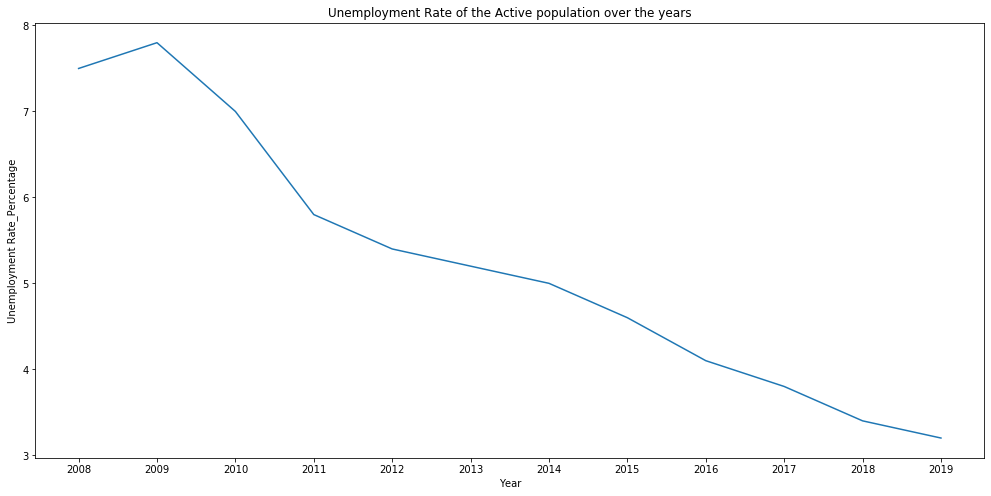

In [26]:
#Plotting with Matplotlib
Year = Germany_unemployment.Year
Percentage = Germany_unemployment.Percentage

fig, ax = plt.subplots(figsize=(17,8))

plt.plot(Year, Percentage)
plt.title('Unemployment Rate of the Active population over the years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate_Percentage')
plt.show()

### Analysis

* From the above graph, It can be vividly seen that unemployment rate of the active population has been decreasing in Germany over the years used for this analysis.

Exporting dataframe

In [27]:
Germany_unemployment.to_csv("Clean_Ger_unemplymt.csv")